### Random forest algorithm
Uses the decision tree technique. Modifies the decision tree into multiple trees making a random forest of trees </br>
Train the individual trees and then take the majority vote decision.
#### Task: Identify hand written digits recognition

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [2]:
digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

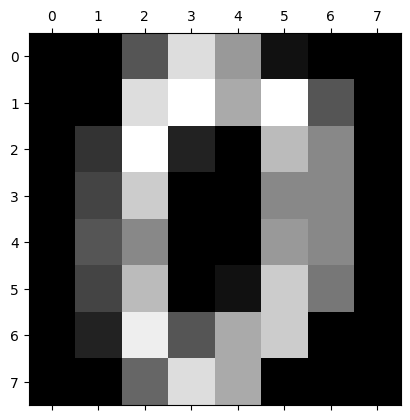

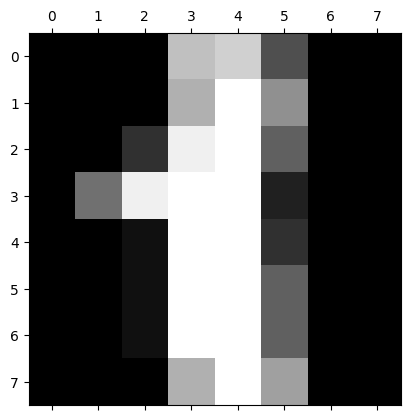

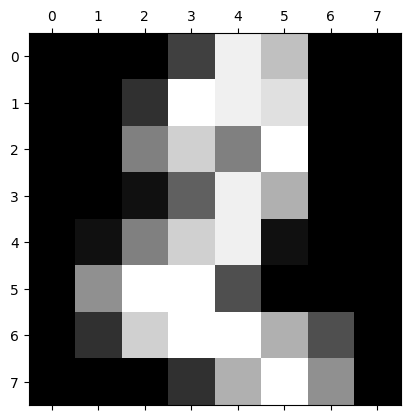

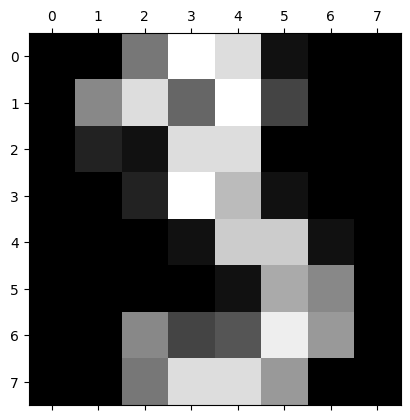

In [4]:
plt.gray()
for i in range(4):
    plt.matshow(digits.images[i])
    plt.show()

In [5]:
# create a pandas dataframe from the digits dataset
df = pd.DataFrame(digits.data, columns=digits.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [6]:
df["target"] = digits.target
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [7]:
# lets define our X and y labels
X = df.drop(["target"], axis="columns")
X.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [8]:
y = df["target"]
y.head()

0    0
1    1
2    2
3    3
4    4
Name: target, dtype: int64

In [9]:
# setting random_state=10 randomly splits the dataset once not every time we run this cell
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)

In [10]:
len(X_train)

1437

In [11]:
len(X_test)

360

In [12]:
# lets use the random forest classifier to train our model
# ensemble means you are using multiple algorithms to predict the outcome
# we are building multiple decision trees and taking a majority vote to predict the final outcome
from sklearn.ensemble import RandomForestClassifier

In [13]:
# Build a forest of trees from the training set (X, y)
# by default, 100 decision trees are used ie n_estimators=100
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [14]:
model.score(X_test,y_test)

0.9666666666666667

In [15]:
# we need the truth values and the predicted values
# predicted values
y_predicted = model.predict(X_test)

In [16]:
# truth values
truth_values = y_test

In [17]:
# import the confusion matrix
from sklearn.metrics import confusion_matrix

In [18]:
# takes 2 parameters, true values and the predicted values
cm = confusion_matrix(truth_values,y_predicted)
cm

array([[36,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 32,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  0, 32,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  0],
       [ 0,  2,  1,  1,  0,  0,  0,  0, 29,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  2,  0, 35]])

Text(95.72222222222221, 0.5, 'Truth')

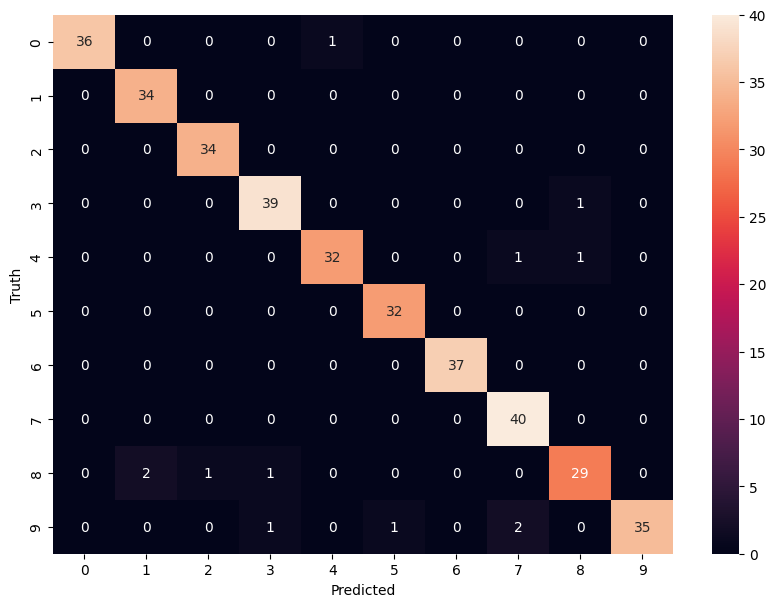

In [19]:
# lets use seaborn to better visualise the data
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

Looking at the results, we can see eg </br>
we had 0 36 times predicted right, 1 was predicted right 31 times etc </br>
we can also see that 8 was wrongly predicted as 1 two times, 9 was wrongly predicted as 7 one time etc

### Exercise
Use famous iris flower dataset from sklearn.datasets to predict flower species using random forest classfier.

1. measure the prediction score using n_estimators(10)
2. Now fine tune your model by changing number of trees in your classifier and find the best score you got and the number of trees used.

In [20]:
# import the iris dataset
from sklearn.datasets import load_iris

In [21]:
# create an instabce of the dataset
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [22]:
len(iris.data)

150

In [23]:
# create a dataframe to easily visualise the dataset
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [25]:
# lets add target to the dataframe
iris_df["target"] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [26]:
# lets define our X and y labels
X = iris_df.drop(["target"], axis=1)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
# y label
y = iris_df["target"]

In [28]:
# lets now split ur dataset
# i want static samples
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)

In [29]:
len(X_train), len(X_test)

(120, 30)

In [30]:
# import the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

measuring the prediction score using n_estimators(10)

In [31]:
iris_model = RandomForestClassifier(n_estimators=10)
iris_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [32]:
iris_model.score(X_test,y_test)

0.9666666666666667

Now fine tuning the model by changing number of  to find best score and number of trees

In [33]:
iris_model = RandomForestClassifier(n_estimators=100)
iris_model.fit(X_train,y_train)

RandomForestClassifier()

In [34]:
iris_model.score(X_test,y_test)

0.9666666666666667